# Clusterização
O agrupamento K-means é um algoritmo de aprendizado não supervisionado utilizado para agrupamento de dados, que agrupa pontos de dados não rotulados em grupos ou clusters.


É um dos métodos de agrupamento mais populares usados em aprendizado de máquina. Diferentemente do aprendizado supervisionado, os dados de treinamento que esse algoritmo utiliza não são rotulados, o que significa que os pontos de dados não têm uma estrutura de classificação definida.

# Implementando algoritmo de K-means
- Carregar o dataset de iris;
- Analisar os dados coletados;
- Realizar o tratamento de dados;
- Aplicar modelo ML de K-means;
- Visualizar os resultados obtidos;

# Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Verificando versões das bibliotecas

In [ ]:
import sklearn
import plotly

print(f'''Verificando as versões das bibliotecas:\n
pandas: {pd.__version__}
numpy: {np.__version__}
sklearn: {sklearn.__version__}
plotly: {plotly.__version__}
''')

Verificando as versões das bibliotecas:

pandas: 2.2.2
numpy: 2.0.2
sklearn: 1.6.1
plotly: 5.24.1



# Coletando dados


In [ ]:
iris = pd.read_csv('/content/iris.csv', sep=';')

# Analisando os dados coletados

In [ ]:
# Visualizando arquivos da base de dados
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


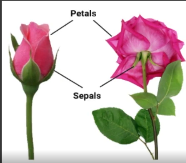

In [ ]:
# Gerando algumas estatísticas da base de dados
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Número de classes existentes no dataframe
iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Contando número de classes
len(iris['Class'].unique())

3

In [ ]:
# Avaliando número de linhas e colunas do dataframe
iris.shape

(150, 5)

In [ ]:
# Verificando se existe algum valor nulo ou ausente
iris.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
Class,0


In [ ]:
# Verificando informações da base de dados
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Criando clusters com os dados das pétalas

Realizar o agrupamento dos dados baseado no comprimento e na largura das pétalas

# Coletando dados das pétalas

In [ ]:
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# criando variável X com as colunas petal length petal width
X_petala = iris.iloc[:, [2,3]].values
X_petala[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

# Normalização de dados
- Aplicada para preparar dados;
- Padronização de um conjunto de dados;
- Se não padronizar, pode ter comportamento ruim e não gerar dados de forma correta;
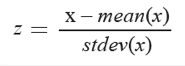

Como o KMeans realiza os cálculos baseado na distância, devemos padronizar os dados afim de que um atributo não seja considerado mais importante que outro

In [ ]:
# Nesse caso, a normalização é desnecessária pelos dados estarem na mesma escala
normalizar_dados = StandardScaler()
X_petala = normalizar_dados.fit_transform(X_petala)
X_petala[:10]

array([[-1.3412724 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.17067529, -1.05003079],
       [-1.3412724 , -1.18150376],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.2844067 , -1.4444497 ]])

# Calculando número de cluster

Para calcular o número do cluster, utilizar o método do cotovelo
WCSS é a soma da distância quadrada entre cada ponto e o centróide em um cluster

In [ ]:
wcss_petala = []
for i in range(1,11):
  kmeans_petala = KMeans(n_clusters=i, random_state=0)
  kmeans_petala.fit(X_petala)
  wcss_petala.append(kmeans_petala.inertia_)

In [ ]:
# visualizando valores de wcss
for i in range(len(wcss_petala)):
  print('Cluster:', i, '- Valor do WCSS:', wcss_petala[i])

Cluster: 0 - Valor do WCSS: 300.0000000000001
Cluster: 1 - Valor do WCSS: 54.14584701344988
Cluster: 2 - Valor do WCSS: 18.046983891906265
Cluster: 3 - Valor do WCSS: 12.307440251261838
Cluster: 4 - Valor do WCSS: 9.192414757507374
Cluster: 5 - Valor do WCSS: 7.227887553963048
Cluster: 6 - Valor do WCSS: 6.699766804805106
Cluster: 7 - Valor do WCSS: 6.200345405305922
Cluster: 8 - Valor do WCSS: 4.93665777737511
Cluster: 9 - Valor do WCSS: 4.533503232466192


# Definindo melhor número de clusters para as pétalas

In [ ]:
grafico_cotovelo_petala = px.line(x=range(1,11), y=wcss_petala, title='Definindo número de Clusters')
grafico_cotovelo_petala.update_layout(xaxis_title='Número de clusters', yaxis_title='Valor de WCSS')
grafico_cotovelo_petala.update_layout(title_x=0.5)
grafico_cotovelo_petala.show()

# Executando o algoritmo K-means para as pétalas

In [ ]:
# Executando algoritmo K-means para pétalas
kmeans_petala = KMeans(n_clusters=3, random_state=0)
label_cluster_petala = kmeans_petala.fit_predict(X_petala)

In [ ]:
# Verifica a classificação dos clusters
label_cluster_petala

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# Visualizando o centroides de cada cluster

In [ ]:
# Visualizando centroide
centroide_petala = kmeans_petala.cluster_centers_
centroide_petala

array([[ 0.30564587,  0.16609419],
       [-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028]])

# Visualizando dados agrupados com dados das pétalas

In [ ]:
# Visualizando dados agrupados com dados das pétalas
grafico_petala = px.scatter(x=X_petala[:,0], y=X_petala[:,1], color = label_cluster_petala)
grafico_centroide = px.scatter( x = centroide_petala[:,0], y = centroide_petala[:,1], size=[7,7,7])
grafico_final = go.Figure(data=grafico_petala.data + grafico_centroide.data)
grafico_final.update_layout(title='Agrupamento das pétalas')
grafico_final.show()

# Criando clusters com os dados das sépalas

# Coletando dados das sépalas

In [ ]:
# Coletando dados das sépalas
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# criando variável X com as colunas sepal lenght e sepal width
X_sepalas = iris.iloc[:, [0,1]].values
X_sepalas = normalizar_dados.fit_transform(X_sepalas)
X_sepalas[:5]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019]])

# Calculando valor do WCSS

In [ ]:
wcss_sepalas = []
for i in range(1,11):
  kmeans_sepalas = KMeans(n_clusters=i, random_state=0)
  kmeans_sepalas.fit(X_sepalas)
  wcss_sepalas.append(kmeans_sepalas.inertia_)

In [ ]:
# visualizando valores de wcss
for i in range(len(wcss_sepalas)):
  print('Cluster:', i, '- Valor do WCSS:', wcss_sepalas[i])

Cluster: 0 - Valor do WCSS: 300.00000000000006
Cluster: 1 - Valor do WCSS: 214.80004445463572
Cluster: 2 - Valor do WCSS: 103.80692090161443
Cluster: 3 - Valor do WCSS: 79.83879949066282
Cluster: 4 - Valor do WCSS: 63.370908146687114
Cluster: 5 - Valor do WCSS: 55.99062559037006
Cluster: 6 - Valor do WCSS: 48.447754565842544
Cluster: 7 - Valor do WCSS: 41.11866957543779
Cluster: 8 - Valor do WCSS: 38.241369474610046
Cluster: 9 - Valor do WCSS: 30.117936364651335


# Visualização dos valores Wcss

In [ ]:
# Visualização dos valores wcss das sépalas
grafico_cotovelo_sepalas = px.line(x=range(1,11), y=wcss_sepalas, title='Definindo número de Clusters')
grafico_cotovelo_sepalas.update_layout(xaxis_title='Número de clusters', yaxis_title='Valor de WCSS')
grafico_cotovelo_sepalas.update_layout(title_x=0.5)
grafico_cotovelo_sepalas.show()

# Definindo o melhor número de clusters das sépalas

In [ ]:
# Definindo o melhor número de clusters das sépalas
kmeans_sepalas = KMeans(n_clusters=3, random_state=0)
label_cluster_sepalas = kmeans_sepalas.fit_predict(X_sepalas)

# Executando o algortimo K-means para as sépalas

In [ ]:
label_cluster_sepalas

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

# Visualizando dados agrupados com dados das sépalas

In [ ]:
centroide_sepala = kmeans_sepalas.cluster_centers_
centroide_sepala


array([[-0.11190209, -0.95528589],
       [ 1.09616533,  0.09718925],
       [-1.00206653,  0.89510445]])

# Criando função para visualização de dados

In [ ]:
# Visualizando dados agrupados com dados das pétalas
grafico_sepalas = px.scatter(x=X_sepalas[:,0], y=X_sepalas[:,1], color = label_cluster_sepalas)
grafico_centroide_sepalas = px.scatter( x = centroide_sepala[:,0], y = centroide_sepala[:,1], size=[7,7,7])
grafico_final = go.Figure(data=grafico_sepalas.data + grafico_centroide_sepalas.data)
grafico_final.update_layout(title='Agrupamento das sépalas')
grafico_final.show()

# Criando função para visualização de dados

In [ ]:
def gera_grafico(X, Y, color, X_centroide, Y_centroide):
  grafico = px.scatter(x=X,
                       y=Y,
                       color = color
                       )
  grafico_centroide = px.scatter( x = X_centroide,
                                 y = Y_centroide)
  grafico_final = go.Figure(data=grafico.data + grafico_centroide.data)
  grafico_final.update_xaxes(title_text='Comprimento')
  grafico_final.update_yaxes(title_text='Largura')
  grafico_final.update_layout(title_text='Clusters', title_x=0.5)
  grafico_final.show()

# Executando a função para as pétalas

In [ ]:
# Executando a função para as pétalas
x=X_petala[:,0]
y=X_petala[:,1]
label_cluster_petala
centroide_petala[:,0]
centroide_petala[:,1]

gera_grafico(x, y, label_cluster_petala, centroide_petala[:,0], centroide_petala[:,1])

# Executando a função para as sépalas

In [ ]:
# Executando a função para as sépalas
x=X_sepalas[:,0]
y=X_sepalas[:,1]
label_cluster_sepalas
centroide_sepala[:,0]
centroide_sepala[:,1]

gera_grafico(x, y, label_cluster_sepalas, centroide_sepala[:,0], centroide_sepala[:,1])
